In [1]:
from edgar import Company, TXTML
import pandas as pd

# Construct dataset

In this assignment, I will consider 168 files from 8 companies EXXON MOBIL, AMAZON, Alphabet, MICROSOFT, APPLE, FORD MOTOR, RAYTHEON, MARATHON PETROLEUM.

In [2]:
companies = [
             ['EXXON MOBIL CORP','0000034088'],
             ['AMAZON COM INC', '0001018724'],
             ['Alphabet Inc.','0001652044'],
             ['MICROSOFT CORP','0000789019'],
             ['APPLE INC', '0000320193'],
             ['FORD MOTOR CO', '0000037996'],
             ['RAYTHEON CO', '0000082267'],
             ['MARATHON PETROLEUM CORP', '0001510295'],
            ]

df = pd.DataFrame(columns=['Company','CIK','Content','Filing Date','Accepted','Documents','Effectiveness Date'])

for company in companies:
    print("Fetching data for ", company[0])
    edgar_company = Company(company[0], company[1])
    
    filings = edgar_company.get_all_filings(filing_type='10-K')
    
    docs = edgar_company.get_documents(tree=filings, 
                                       no_of_documents=100,
                                       as_documents=True)
    
    docs_content = edgar_company.get_10Ks(100)
    
    for doc, content in zip(docs, docs_content):
        new_row = doc.content
        new_row['Company'] = company[0]
        new_row['CIK'] = company[1]
        new_row['Content'] = TXTML.parse_full_10K(content)
        if len(new_row['Content']):
            df = df.append(new_row, ignore_index=True)


Fetching data for  EXXON MOBIL CORP
Fetching data for  AMAZON COM INC
Fetching data for  Alphabet Inc.
Fetching data for  MICROSOFT CORP
Fetching data for  APPLE INC
Fetching data for  FORD MOTOR CO
Fetching data for  RAYTHEON CO
Fetching data for  MARATHON PETROLEUM CORP


In [5]:
df

,Company,CIK,Content,Filing Date,Accepted,Documents,Effectiveness Date,Period of Report,SROs
0,EXXON MOBIL CORP,0000034088,0.086252036-04-012021-08-152037-08-012038-06-1...,2020-02-26,2020-02-26 16:15:19,138,NaN,2019-12-31,NaN
1,EXXON MOBIL CORP,0000034088,2018 united states securities and exchange com...,2019-02-27,2019-02-27 16:19:37,133,NaN,2018-12-31,NaN
2,EXXON MOBIL CORP,0000034088,2017 united states securities and exchange com...,2018-02-28,2018-02-28 16:39:51,135,NaN,2017-12-31,NaN
3,EXXON MOBIL CORP,0000034088,2016 united states securities and exchange com...,2017-02-22,2017-02-22 16:47:56,133,NaN,2016-12-31,NaN
4,EXXON MOBIL CORP,0000034088,2015 united states securities and exchange com...,2016-02-24,2016-02-24 16:09:22,133,NaN,2015-12-31,NaN
...,...,...,...,...,...,...,...,...,...
66,MARATHON PETROLEUM CORP,0001510295,10-k table of contents united states securitie...,2016-02-26,2016-02-26 14:59:20,193,NaN,2015-12-31,NaN
67,MARATHON PETROLEUM CORP,0001510295,mpc-2014.12.31-10k table of contents united st...,2015-02-27,2015-02-27 13:44:04,19,NaN,2014-12-31,NaN
68,MARATHON PETROLEUM CORP,0001510295,mpc-2013.12.31-10k table of contents united st...,2014-02-28,2014-02-28 14:59:24,17,NaN,2013-12-31,NaN
69,MARATHON PETROLEUM CORP,0001510295,10-k table of contents united states securitie...,2013-02-28,2013-02-28 17:04:19,20,NaN,2012-12-31,NaN


# Split words and lower them

In [6]:
df['Content'] = df['Content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,Company,CIK,Content,Filing Date,Accepted,Documents,Effectiveness Date,Period of Report,SROs
0,EXXON MOBIL CORP,0000034088,0.086252036-04-012021-08-152037-08-012038-06-1...,2020-02-26,2020-02-26 16:15:19,138,NaN,2019-12-31,NaN
1,EXXON MOBIL CORP,0000034088,2018 united states securities and exchange com...,2019-02-27,2019-02-27 16:19:37,133,NaN,2018-12-31,NaN
2,EXXON MOBIL CORP,0000034088,2017 united states securities and exchange com...,2018-02-28,2018-02-28 16:39:51,135,NaN,2017-12-31,NaN
3,EXXON MOBIL CORP,0000034088,2016 united states securities and exchange com...,2017-02-22,2017-02-22 16:47:56,133,NaN,2016-12-31,NaN
4,EXXON MOBIL CORP,0000034088,2015 united states securities and exchange com...,2016-02-24,2016-02-24 16:09:22,133,NaN,2015-12-31,NaN


# Remove punctuation

In [7]:
df['Content'] = df['Content'].str.replace('[^\w\s]','')

# Remove stop words

In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_set = set(stop) # using set to improve performance

ModuleNotFoundError: No module named 'nltk'

In [9]:
df['Content'] = df['Content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_set))

NameError: name 'stop_set' is not defined

# Overall Visualisation

In [100]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
stop_words = set(STOPWORDS)

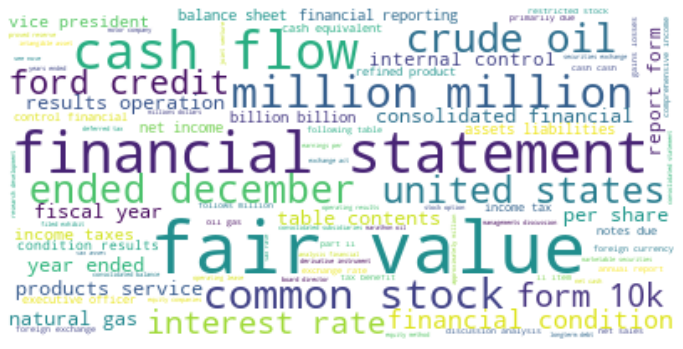

In [101]:
word = " ".join(df['Content'])
wordcloud = WordCloud(stopwords=stop, background_color="white").generate(word)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

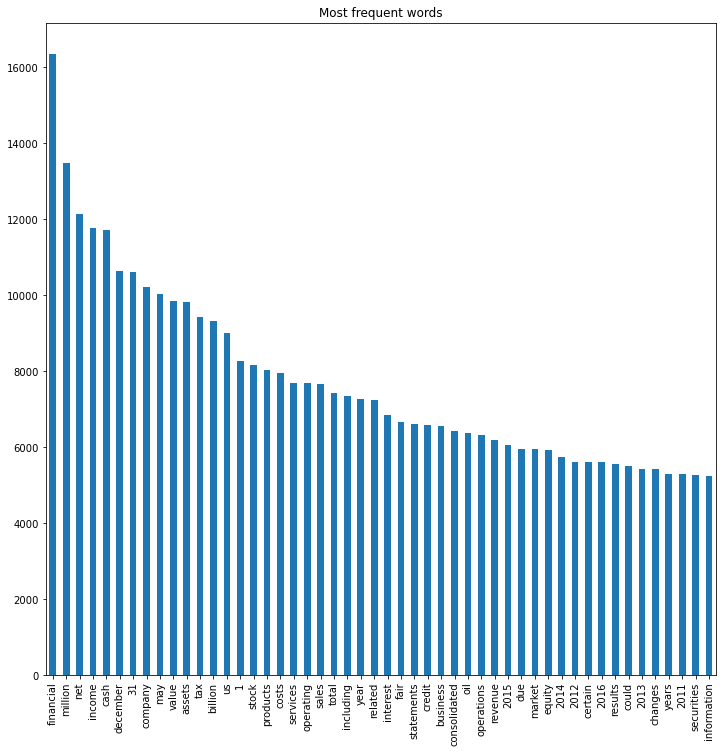

In [102]:
pd.Series(' '.join(df['Content']).split()).value_counts()[:50].plot(kind='bar', title='Most frequent words', figsize=(12, 12))


In [103]:
freq = pd.Series(' '.join(df['Content']).split()).value_counts()[:50]
freq

financial       16357
million         13472
net             12144
income          11761
cash            11705
december        10644
31              10600
company         10210
may             10031
value            9841
assets           9835
tax              9425
billion          9331
us               9016
1                8269
stock            8167
products         8043
costs            7955
services         7696
operating        7680
sales            7675
total            7418
including        7339
year             7256
related          7229
interest         6843
fair             6650
statements       6612
credit           6574
business         6552
consolidated     6429
oil              6371
operations       6319
revenue          6198
2015             6044
due              5958
market           5943
equity           5917
2014             5748
2012             5614
certain          5612
2016             5601
results          5551
could            5500
2013             5430
changes   

Overall, the most frequent words are "financial", "million", "net", "income", etc. It is likely that most of these files are financial reports or related to financial situation of the companies.

# Create more stop words

In [104]:
# Let's list rare words
rare = pd.Series(' '.join(df['Content']).split()).value_counts()[-50:]

After listing rare words, we can see many of them are strings with both numbers and characters, which look like typos and are not important. We will try to get rid of these words. My strategy is to remove all words appearing exactly once because it is highly possible that those random string only appear once. 

In [105]:
# list all words appearing exactly once
counts = pd.Series(' '.join(df['Content']).split()).value_counts()
words_appear_once = list(dict(counts[counts == 1]).keys())

words_appear_once[0:20]

['mvx8ftr96utwyo7l6n8v486ydu2r97u',
 '93125000',
 'expenses10972',
 'systemsublette',
 '5reclassification',
 'restructurings117',
 'xomgoldenpasslngterminalllcmember',
 '52bob',
 'b109',
 'm4sxw2tns4501h97ed5h15040i5o1c43n',
 '66a',
 'activities31165',
 'america2967',
 'm2d',
 '30international',
 'q34n350xjbd5h15040i5',
 'profits48item',
 'products215',
 '572propane',
 '29apac']

In [106]:
additional_stop = words_appear_once
print("There are", len(additional_stop), "additional stop words to be removed")
additional_stop = set(additional_stop) # use set to improve performance

There are 42260 additional stop words to be removed


In [107]:
# remove those additional stop words
df['Content'] = df['Content'].apply(lambda x: " ".join(x for x in x.split() if x not in additional_stop))

We still see a lot of numbers. They may be important but do not give us much insight. We will get rid of them too.

In [108]:
def has_digits(input_string): # return true if input_string has digits inside
    return any(char.isdigit() for char in input_string)

df['Content'] = df['Content'].apply(lambda x: " ".join(x for x in x.split() if not has_digits(x)))


In [109]:
df['Content'][1][0:1000]

'united states securities exchange commission washington dc form annual report pursuant section securities exchange act fiscal year ended december transition report pursuant section securities exchange act transition period commission file number exxon mobil corporation exact name registrant specified charter new jersey state jurisdiction incorporation organization irs employer identification number las colinas boulevard irving texas address principal executive offices zip code registrants telephone number including area code securities registered pursuant section act title class name exchange registered common stock without par value shares outstanding january new york stock exchange indicate check mark registrant wellknown seasoned issuer defined rule securities act yes indicate check mark registrant required file reports pursuant section section act yes indicate check mark whether registrant filed reports required filed section securities exchange act preceding months shorter period

# Lemmatize words

In [110]:
from textblob import Word
df['Content'] = df['Content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


# Visualization after Processing

Most frequent words

In [134]:
top_words = pd.Series(' '.join(df['Content']).split()).value_counts()[:50]
top_words

company         18080
million         17605
financial       16357
tax             13028
cost            12719
year            12542
asset           12463
net             12144
product         12102
income          11761
cash            11705
value           10881
december        10644
service         10251
may             10033
billion          9507
sale             9428
u                9052
statement        8638
result           8467
share            8330
revenue          8296
stock            8221
change           8210
market           7931
credit           7928
interest         7875
business         7742
operating        7680
note             7524
total            7461
rate             7423
plan             7352
including        7339
related          7229
investment       7150
amount           6738
security         6697
operation        6654
fair             6650
price            6632
oil              6583
consolidated     6429
expense          6273
loss             6159
period    

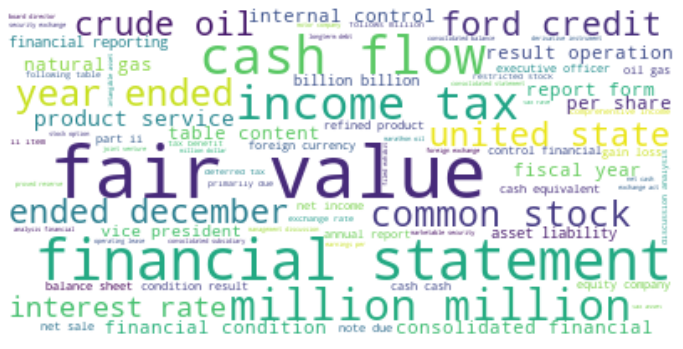

In [112]:
word = " ".join(df['Content'])
wordcloud = WordCloud(stopwords=stop, background_color="white").generate(word)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

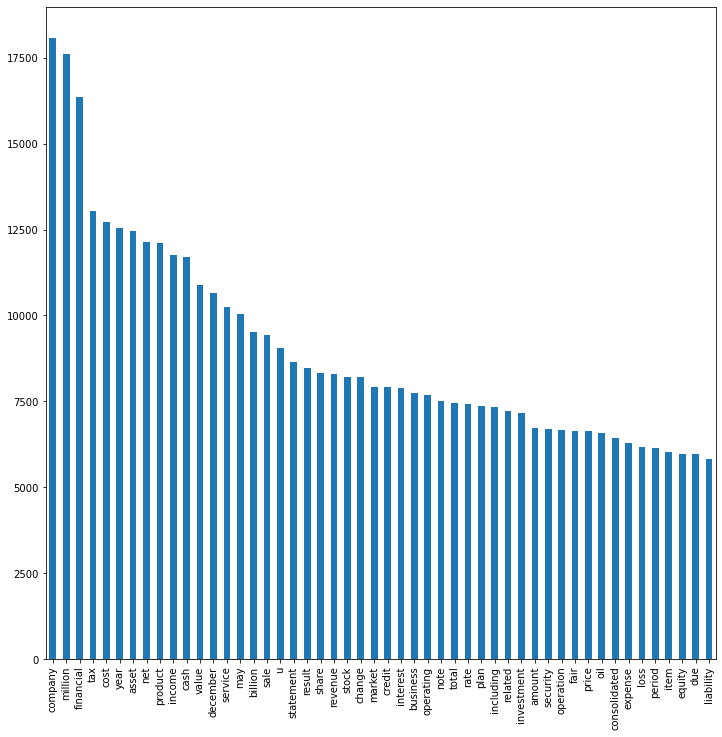

In [113]:
pd.Series(' '.join(df['Content']).split()).value_counts()[:50].plot(kind='bar', figsize=(12, 12))


There are not many changes after processing. The word list is now cleaner. Words like "company", "million", and "financial" now appear significantly more than the rest. It is due to the reason that "Lemmatization" combines plural and singular words like "company" and "companies", "million" and "millions".

# Distinctness

In [114]:
del df['CIK'] # Delete CIK

In [115]:
log_df = df.copy()

In [116]:
# Combine all documents of every company
log_df = log_df.groupby('Company').sum()

In [117]:
log_df

,Content,Filing Date,Accepted,Documents,Effectiveness Date,Period of Report,SROs
Company,,,,,,,
AMAZON COM INC,document usgaapproductmember usgaapservicememb...,2020-01-312019-02-012018-02-022017-02-102016-0...,2020-01-30 20:46:132019-01-31 20:22:402018-02-...,109106110929314141514,0,2019-12-312018-12-312017-12-312016-12-312015-1...,0
APPLE INC,document usgaapcommonstockmember usgaapproduct...,2019-10-312018-11-052017-11-032016-10-262015-1...,2019-10-30 18:12:362018-11-05 08:01:402017-11-...,968897961518141315,0,2019-09-282018-09-292017-09-302016-09-242015-0...,0
Alphabet Inc.,document usgaapcommonclassbmember googcapitalc...,2020-02-042019-02-062019-02-052018-02-062017-0...,2020-02-03 21:03:592019-02-06 06:07:022019-02-...,11221001041077119,0,2019-12-312018-12-312018-12-312017-12-312016-1...,0
EXXON MOBIL CORP,usgaapusgovernmentdebtsecuritiesmember country...,2020-02-262019-02-272018-02-282017-02-222016-0...,2020-02-26 16:15:192019-02-27 16:19:372018-02-...,138133135133133263013514313613668,0,2019-12-312018-12-312017-12-312016-12-312015-1...,0
FORD MOTOR CO,document usgaapcommonclassbmember usgaapcommon...,2020-02-052019-02-212018-03-282018-02-082017-0...,2020-02-05 12:01:222019-02-21 16:10:102018-03-...,161185819781748170853515751,0,2019-12-312018-12-312017-12-312017-12-312016-1...,0
MARATHON PETROLEUM CORP,document usgaapadditionalpaidincapitalmember u...,2020-02-282019-02-282018-02-282017-02-242016-0...,2020-02-28 16:23:562019-02-28 14:17:562018-02-...,21422220320919319172029,0,2019-12-312018-12-312017-12-312016-12-312015-1...,0
MICROSOFT CORP,false fy usgaapcommonstockmember xbrlishares x...,2020-07-302019-08-012018-08-032017-08-022016-0...,2020-07-30 20:44:462019-08-01 16:09:552018-08-...,13914414614814717151515155,0,2020-06-302019-06-302018-06-302017-06-302016-0...,0
RAYTHEON CO,page security exchange commission washington c...,1995-03-27,1995-03-27 00:00:00,6,0,1994-12-31,NYSE


In [118]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=10000, lowercase=True, ngram_range=(1, 2),analyzer = "word")
data_bow = bow.fit_transform(log_df['Content'])


In [119]:
data_bow.shape

(8, 10000)

In [120]:
import numpy as np
words = np.array(bow.get_feature_names())
companies = log_df.axes[0].to_numpy()


In [121]:
# Calculate total occurences of each word in words
# Calculate sum of each column
word_counts = [0 for _ in range(len(words))]
for i, word in enumerate(words):
    word_counts[i] = np.sum(data_bow[:, i])

In [122]:
# Calculate length of each company
# = Calculate sum of each row
company_length = [0 for _ in range(len(companies))]
for i, word in enumerate(companies):
    company_length[i] = np.sum(data_bow[i])

company_length

[254681, 293762, 184651, 510475, 500410, 507376, 395930, 4136]

In [123]:
total_occurrences = np.sum(word_counts)
print("There are total of", np.sum(word_counts), "occurrences")


There are total of 2651421 occurrences


In [124]:
# Calculate log likelihood for each company
# Using formula in "Text Mining South Park"
companies_loglikelihood = []
eps = 0.01
for idx_comp, company in enumerate(companies):
    loglikely = []
    for idx_word in data_bow[idx_comp].indices:
        a = data_bow[idx_comp, idx_word] # word in company
        b = word_counts[idx_word] - a # word in remaining companies
        c = company_length[idx_comp] - a # not word in company
        d = total_occurrences - a - b - c # not word in remaining
        E1 = (a + c) * (a + b) / total_occurrences 
        E2 = (b + d) * (a + b) / total_occurrences 
        
        LL = 2 * (a * np.log(a / E1))
        if (b > 0):
            LL += 2 * b * np.log(b / E2)
        
        loglikely.append((LL, words[idx_word]))
    loglikely = sorted(loglikely, reverse=True)
    companies_loglikelihood.append(loglikely)
    

In [125]:
print("The 20 most distinctive words in each company. The words are listed from high to low ranking")
print("-------------------------------------------\n")
for i, company in enumerate(companies):
    print(company + ": ", end='')
    distinct_words = [word[1] for word in companies_loglikelihood[i][:20]]
    print(distinct_words)
    print("\n-----------------------------\n")

The 20 most distinctive words in each company. The words are listed from high to low ranking
-------------------------------------------

AMAZON COM INC: ['fulfillment', 'seller', 'amazoncom', 'amazon', 'complaint', 'amazoncom inc', 'district', 'aws', 'item part', 'shipping', 'corporation', 'tax', 'website', 'patent', 'state district', 'production', 'stockbased compensation', 'plan', 'company', 'wrongdoing']

-----------------------------

APPLE INC: ['company', 'september', 'net sale', 'apple', 'mac', 'iphone', 'december', 'september september', 'inc form', 'company product', 'ipad', 'store', 'apple inc', 'io', 'component', 'itunes', 'september company', 'corporation', 'product', 'app']

-----------------------------

Alphabet Inc.: ['google', 'class', 'alphabet', 'contentsalphabet', 'class common', 'class capital', 'network member', 'capital stock', 'ad', 'form file', 'google network', 'advertiser', 'revenue', 'user', 'advertising', 'share class', 'class class', 'member', 'bet', 'non

We can see most of the distinctive words are companies' own names or own products. For example, we can see "Microsoft" and "Window" appear the most in Microsoft Corp, or "Gas", "Oil" appear as high rankings in EXXON. 

# Number of words by time

In [252]:
df.groupby('Period of Report').sum()

,word_count
Period of Report,
1994-12-01,30763
2001-06-01,116339
2009-12-01,311590
2010-12-01,502053
2011-06-01,207768
2011-09-01,197374
2011-12-01,1130983
2012-06-01,215767
2012-09-01,196727


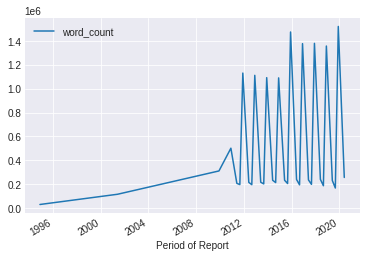

In [254]:
df.groupby('Period of Report').sum().plot()

# Analyze special words by time

In [160]:
special_words = ['emission', 'disaster', 'change', 'pollution', 'uncertain', 'heat', 'risk', 'sustainable', 'flooding', 'temperature', 'carbon', 'drought', 'regulation', 'solar', 'wind', 'nuclear', 'environment', 'storm', 'oil', 'sea', 'ozone', 'spill', 'climate', 'water', 'climate', 'investor', 'fund', 'waste', 'air', 'pollution', 'economy', 'green', 'worker', 'temperature', 'ozone', 'profit', 'land', 'invest', 'labor', 'recycle']


We will use period of report for all documents.

In [126]:
df['Period of Report'].unique()

array(['2019-12-31', '2018-12-31', '2017-12-31', '2016-12-31',
       '2015-12-31', '2014-12-31', '2013-12-31', '2012-12-31',
       '2011-12-31', '2010-12-31', '2009-12-31', '2020-06-30',
       '2019-06-30', '2018-06-30', '2017-06-30', '2016-06-30',
       '2015-06-30', '2014-06-30', '2013-06-30', '2012-06-30',
       '2011-06-30', '2001-06-30', '2019-09-28', '2018-09-29',
       '2017-09-30', '2016-09-24', '2015-09-26', '2014-09-27',
       '2013-09-28', '2012-09-29', '2011-09-24', '1994-12-31'],
      dtype=object)

As we can see, there are no period of report having the same month so we will use this column directly without processing the date.

In [127]:
df['Period of Report'] = df['Period of Report'].values.astype('datetime64[M]')


In [128]:
df['word_count'] = df['Content'].apply(lambda x: len(x))

## Initial special words list

### Get the count of special words for each period of report

We will only consider files from 2008 till now.

In [200]:
# create a dummy data frame
word_per_year_counts = pd.DataFrame() 


# the following lines essentially create word frequencies "grouped" by period of report.  We're using a for loop rather than group_by. 
for m in set(df['Period of Report']):
    if (m.year < 2008): continue
    freq = pd.Series(' '.join(df.loc[df['Period of Report'] == m, 'Content']).split()).value_counts()
    special_freq = []
    for word in freq.items():
        if (word[0] in special_words):
            special_freq.append(word)
    freq2 = pd.DataFrame(special_freq, columns=['word', 'count'])
    freq2['Period of Report'] = m
    word_per_year_counts = word_per_year_counts.append(freq2)

word_per_year_counts


,word,count,Period of Report
0,change,89,2017-06-01
1,risk,71,2017-06-01
2,fund,16,2017-06-01
3,regulation,12,2017-06-01
4,environment,11,2017-06-01
...,...,...,...
11,invest,2,2015-09-01
12,investor,2,2015-09-01
13,economy,1,2015-09-01
14,climate,1,2015-09-01


In [212]:
word_per_year_counts.groupby('word').sum().sort_values(by='count', ascending=False)

,count
word,
change,8154
oil,6582
risk,5244
regulation,2174
fund,1515
emission,1042
profit,620
environment,572
investor,540


### Find just the top words overall -- their per-month-year counts

In [201]:
special_words_over_time = pd.DataFrame()

for word in set(word_per_year_counts['word']): # cycling through the unique words in the dataframe above
    if word in set(special_words): # if the word is a top word
        special_words_over_time = special_words_over_time.append(word_per_year_counts.loc[word_per_year_counts['word'] == word]) #grab the row.
        
        
special_words_over_time

,word,count,Period of Report
31,flooding,1,2017-12-01
31,flooding,1,2015-12-01
30,flooding,2,2018-12-01
10,flooding,4,2011-09-01
31,flooding,1,2016-12-01
...,...,...,...
12,air,3,2009-12-01
15,air,1,2017-09-01
12,air,2,2018-09-01
13,air,34,2019-12-01


In [202]:
# convert month-year back to date format for easier plotting
special_words_over_time['Period of Report'] = special_words_over_time['Period of Report'].values.astype('datetime64[M]')
special_words_over_time

,word,count,Period of Report
31,flooding,1,2017-12-01
31,flooding,1,2015-12-01
30,flooding,2,2018-12-01
10,flooding,4,2011-09-01
31,flooding,1,2016-12-01
...,...,...,...
12,air,3,2009-12-01
15,air,1,2017-09-01
12,air,2,2018-09-01
13,air,34,2019-12-01


## Line chart with raw count

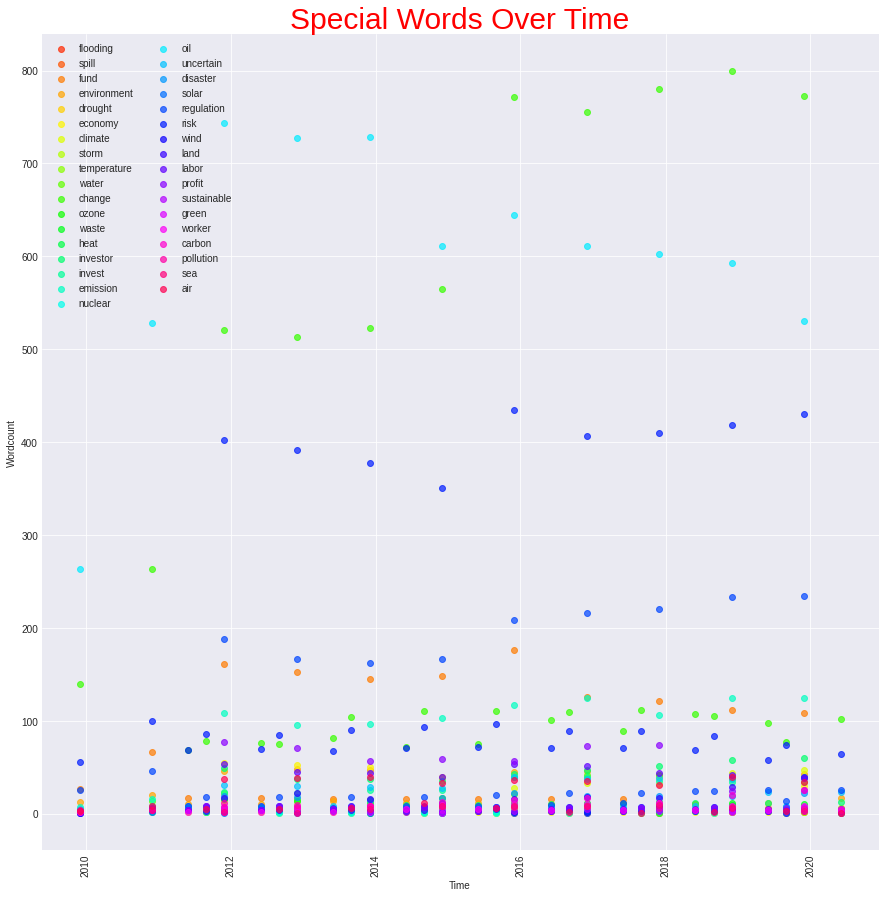

In [245]:
%matplotlib inline

# style
plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
  
# create a color palette
palette = plt.get_cmap('hsv') # this tells matplotlib what colors to use.  you can play with this to change the colors.

num = 0

# change the figure's size here
plt.figure(figsize=(15,15))

# this is the for loop that creates multiple plots
for word in set(special_words_over_time['word']):
    num += 7
    plt.scatter(special_words_over_time.loc[special_words_over_time['word'] == word, 'Period of Report'], # x axis 
             special_words_over_time.loc[special_words_over_time['word'] == word, 'count'],  # y axis
             color=palette(num), linewidth=1, alpha=0.7, label=word) # num tells the plot to choose a different color this time

# Add legend
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
 
# Add titles
plt.title("Special Words Over Time", fontsize=30, fontweight=0, color='Red')
plt.xlabel("Time")
plt.ylabel("Wordcount")

plt.show()


## New special word list

We realize some words appearing so few times and not containing meanings. Therefore, we will create a new list and visualize it. We are only considering words related to climate.

In [264]:
# This is the new special word list
special_words = ['emission', 'disaster', 'pollution', 'sustainable', 'flooding', 'temperature', 'carbon', 'drought', 'regulation', 'solar', 'wind', 'nuclear', 'environment', 'storm', 'sea', 'ozone', 'spill', 'climate', 'water', 'air', 'pollution', 'green', 'land', 'recycle']


In [265]:
# create a dummy data frame
word_per_year_counts = pd.DataFrame() 

# the following lines essentially create word frequencies "grouped" by period of report.  We're using a for loop rather than group_by. 
for m in set(df['Period of Report']):
    if (m.year < 2008): continue
    freq = pd.Series(' '.join(df.loc[df['Period of Report'] == m, 'Content']).split()).value_counts()
    special_freq = []
    for word in freq.items():
        if (word[0] in special_words):
            special_freq.append(word)
    freq2 = pd.DataFrame(special_freq, columns=['word', 'count'])
    freq2['Period of Report'] = m
    word_per_year_counts = word_per_year_counts.append(freq2)

word_per_year_counts


,word,count,Period of Report
0,regulation,12,2017-06-01
1,environment,11,2017-06-01
2,climate,3,2017-06-01
3,emission,3,2017-06-01
4,land,3,2017-06-01
...,...,...,...
2,air,6,2015-09-01
3,land,5,2015-09-01
4,environment,3,2015-09-01
5,climate,1,2015-09-01


In [266]:
word_per_year_counts.groupby('word').sum().sort_values(by='count', ascending=False)

,count
word,
regulation,2174
emission,1042
environment,572
air,375
climate,295
water,268
land,250
disaster,242
carbon,132


In [267]:
special_words_over_time = pd.DataFrame()

for word in set(word_per_year_counts['word']): # cycling through the unique words in the dataframe above
    if word in set(special_words): # if the word is a top word
        special_words_over_time = special_words_over_time.append(word_per_year_counts.loc[word_per_year_counts['word'] == word]) #grab the row.
        
        
special_words_over_time

,word,count,Period of Report
19,flooding,1,2017-12-01
19,flooding,1,2015-12-01
18,flooding,2,2018-12-01
4,flooding,4,2011-09-01
19,flooding,1,2016-12-01
...,...,...,...
6,air,3,2009-12-01
6,air,1,2017-09-01
4,air,2,2018-09-01
5,air,34,2019-12-01


In [268]:
# convert month-year back to date format for easier plotting
special_words_over_time['Period of Report'] = special_words_over_time['Period of Report'].values.astype('datetime64[M]')


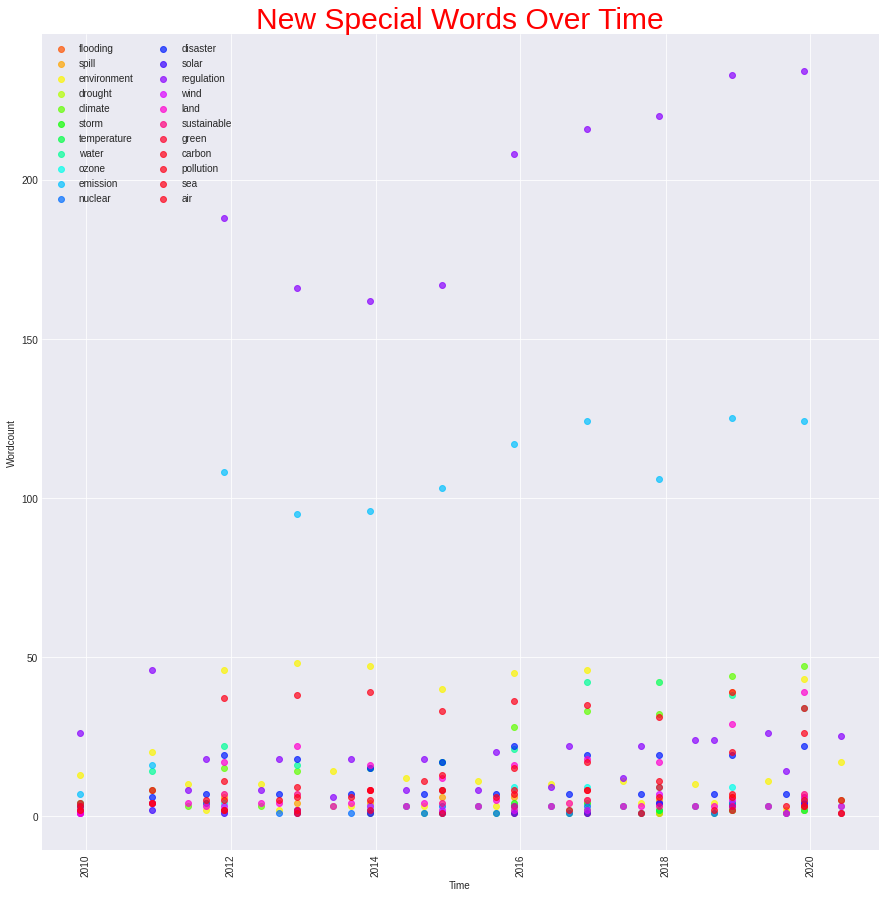

In [269]:
%matplotlib inline

# style
plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
  
# create a color palette
palette = plt.get_cmap('hsv') # this tells matplotlib what colors to use.  you can play with this to change the colors.

num = 0

# change the figure's size here
plt.figure(figsize=(15,15))

# this is the for loop that creates multiple plots
for word in set(special_words_over_time['word']):
    num += 14
    plt.scatter(special_words_over_time.loc[special_words_over_time['word'] == word, 'Period of Report'], # x axis 
             special_words_over_time.loc[special_words_over_time['word'] == word, 'count'],  # y axis
             color=palette(num), linewidth=1, alpha=0.7, label=word) # num tells the plot to choose a different color this time

# Add legend
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
 
# Add titles
plt.title("New Special Words Over Time", fontsize=30, fontweight=0, color='Red')
plt.xlabel("Time")
plt.ylabel("Wordcount")

plt.show()
